In [1]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
import livelossplot
plot_losses=livelossplot.PlotLossesKeras()

%matplotlib inline
NUM_ROWS=28
NUM_COLS=28
NUM_CLASSES=10
BATCH_SIZE=128
EPOCHS=10

In [4]:
def data_summary(X_train, y_train, X_test, y_test):
    """"Summarize current state of dataset"""
    print('Train image shape:', X_train.shape)
    print('train lables shape:', y_trian.shape)
    print('Test image shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

In [5]:
#load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#check state of dataset
data_summary=(X_train, y_train, X_test, y_test)

In [6]:
#Reshape data
X_train= X_train.reshape((X_train.shape[0], NUM_ROWS*NUM_COLS))
X_train=X_train.astype('float32')/255
X_test=X_test.reshape((X_test.shape[0], NUM_ROWS*NUM_COLS))
X_test=X_test.astype('float32')/255

In [7]:
#Categorical encode labels
y_train=to_categorical(y_train, NUM_CLASSES)
y_test=to_categorical(y_test, NUM_CLASSES)

In [8]:
#check state of dataset
data_summary=(X_train, y_train, X_test, y_test)

In [9]:
#Build the neural network
model=models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS*NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

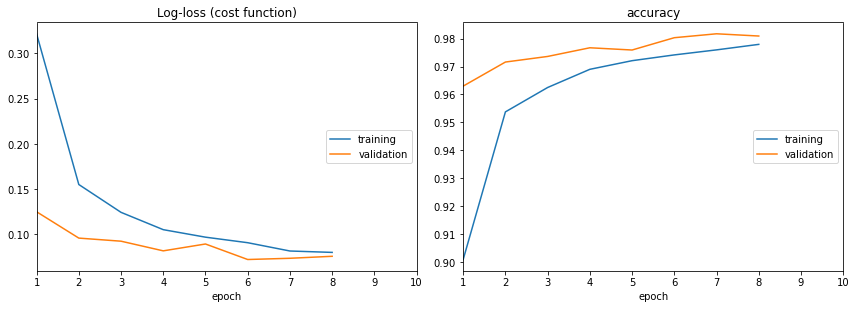

Epoch 9/10
31616/60000 [==============>...............] - ETA: 3s - loss: 0.0739 - accuracy: 0.9787

In [ ]:
#compile model
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#train model
model.fit(X_train, y_train,
         batch_size=BATCH_SIZE,
         epochs=EPOCHS,
         callbacks=[plot_losses], 
         verbose=1,
         validation_data=(X_test, y_test))

score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#Summary of neural network
model.summary()